In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import os
import math
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Data preparation + visualization

In [2]:
# Importing our Data
df = pd.read_csv(r"D:\\Datasets\\housingprices\\Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# Null-checking
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<Axes: >

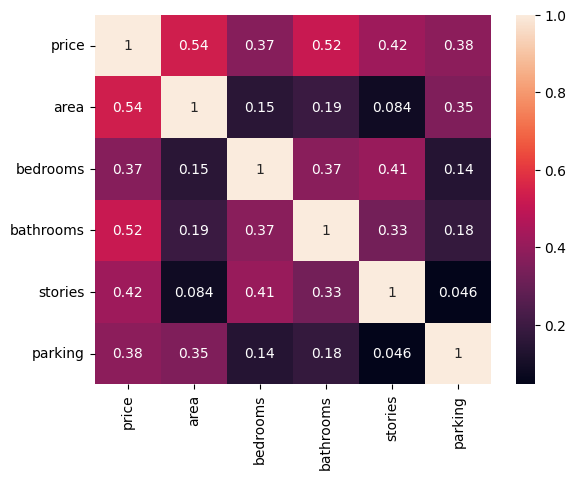

In [7]:
# Loocking for correlations in Data
sns.heatmap(data=df.select_dtypes(['int64','float64']).corr(), annot=True)

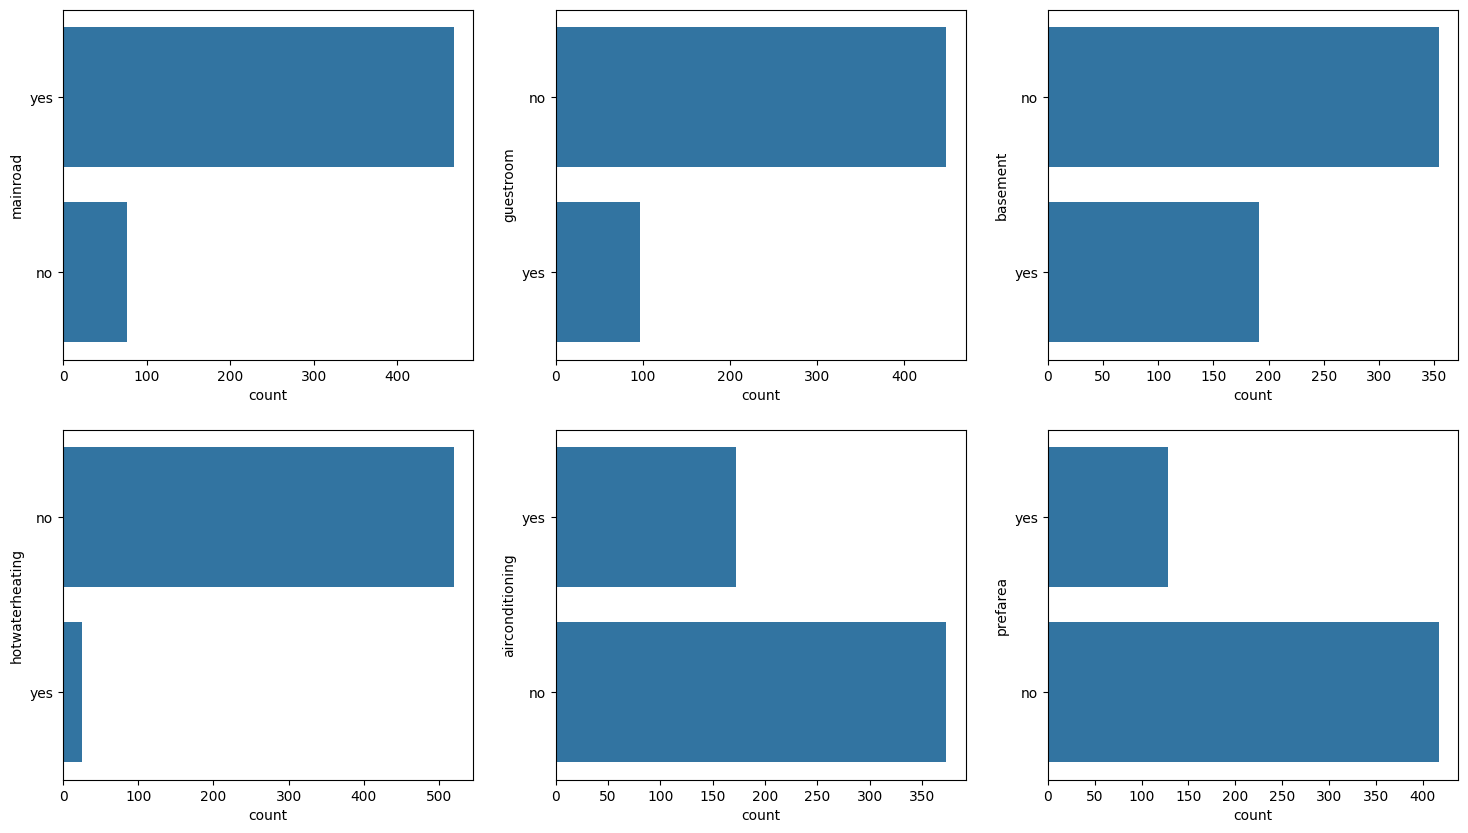

In [8]:
fig, axs = plt.subplots(2, 3, figsize = (18,10))

plt1 = sns.countplot(df['mainroad'], ax = axs[0, 0])
plt2 = sns.countplot(df['guestroom'], ax = axs[0, 1])
plt3 = sns.countplot(df['basement'], ax = axs[0, 2])
plt1 = sns.countplot(df['hotwaterheating'], ax = axs[1, 0])
plt2 = sns.countplot(df['airconditioning'], ax = axs[1, 1])
plt3 = sns.countplot(df['prefarea'], ax = axs[1, 2])


<Axes: xlabel='area', ylabel='price'>

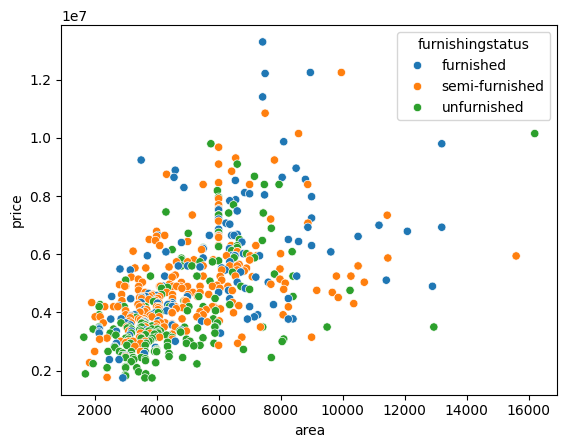

In [9]:
# Furnishingstatus
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

# ML-Based Evaluation of Housing Features Impact on Price

In [10]:
# Split features and target
df = pd.read_csv(r"D:\\Datasets\\housingprices\\Housing.csv")
x = df.drop("price", axis=1).copy()
y = df["price"].copy()

In [11]:
# Define feature types
num_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
cat_features = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea",
    "furnishingstatus",
]


In [12]:
# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(drop="first", sparse_output=False), cat_features),
        ("numerical", StandardScaler(), num_features)
    ]
)

In [13]:
# Create the regression model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [14]:
# Train the model and getting coeficient form them, then converting the results into the procents
model.fit(x, y)

# Get encoded feature names 
encoded_features = model.named_steps["preprocessor"].named_transformers_["categorical"].get_feature_names_out(cat_features)

final_features = np.concatenate([encoded_features, num_features])

coefficients = model.named_steps["regressor"].coef_

# Create results table 
results = pd.DataFrame({
    "Feature": final_features,
    "Coefficient": coefficients
})

mean_price = y.mean()
results["Impact_%"] = (results["Coefficient"] / mean_price) * 100

In [15]:
# Sort
results = results.sort_values(by="Impact_%", ascending=False)

In [16]:
print("\nFeature Impact on Price (%):")
print(results)


Feature Impact on Price (%):
                            Feature    Coefficient   Impact_%
4               airconditioning_yes  864958.311317  18.145740
3               hotwaterheating_yes  855447.145397  17.946208
5                      prefarea_yes  651543.799863  13.668572
8                              area  529330.603637  11.104692
10                        bathrooms  495817.709085  10.401634
0                      mainroad_yes  421272.588726   8.837770
11                          stories  390748.265675   8.197408
2                      basement_yes  350106.904136   7.344804
1                     guestroom_yes  300525.859636   6.304656
12                          parking  238532.391199   5.004110
9                          bedrooms   84642.788854   1.775700
6   furnishingstatus_semi-furnished  -46344.619980  -0.972252
7      furnishingstatus_unfurnished -411234.386157  -8.627182
